# PSI3471 - Exercício 2
### Fernando Zolubas Preto - NUSP: 10694192
### Vinícius Melo de Souza - NUSP: 10772272
# Perceptron de Rosenblatt

Um classificador binário usando o perceptron de Rosenblatt para classificar imagens de círculos ou quadrados.

Nosso objetivo neste exercício é replicar o experimento de classificação de caracteres, porém para circulos e quadrados, através do perceptron de rosenblatt.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

O arquivo csv "circles_and_squares" é um arquivo com 1000 linhas e 401 colunas, cada linha se refere à um exemplo no banco de dados(um circulo ou um quadrado). 

As primeiras 400 colunas podem ser transformadas em uma matriz 20x20 que representam a digitalização da imagem do circulo ou do quadrado.

A ultima coluna é um rótulo, no caso indicando -1 ou 1 se for um circulo, ou quadrado, respectivamente.

In [13]:
data_df = pd.read_csv("circles_and_squares.csv")

Podemos ver com o head do data frame que criamos esta propriedade dos dados:

In [14]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


E o tamanho dos dados com .shape:

In [15]:
data_df.shape

(1000, 401)

In [16]:
data = data_df.to_numpy()

Fizemos uma função para visualizarmos a imagem que queremos, precisamos passar o data frame e a linha que queremos visualizar:

In [17]:
def showImage(image_line_index,data):
    img = data[image_line_index,:-1].reshape((20,20))
    plt.imshow(img,cmap='gray')

No caso, um exemplo para a linha 10:

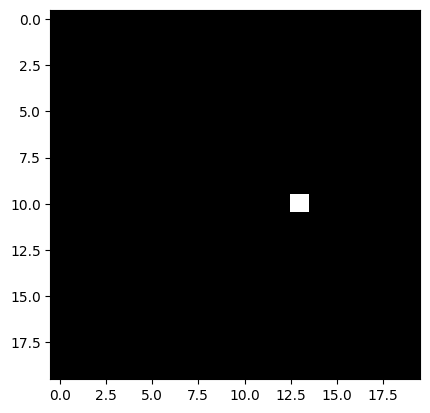

In [18]:
showImage(10, data)

Podemos ver que ela é um circulo, e para verificar que de fato é um circulo podemos ver a ultima coluna do dataframe na linha 10 e devemos ver "-1":

In [19]:
data[10, 400]

1.0

In [20]:
def getLabel(image_line_index,data):
    return data[image_line_index,400]

In [21]:
def sgn(v):
    return np.where(v > 0, 1, -1)

Queremos utilizar as primeiras 800 linhas do banco de dados para realizar o treinamento do perceptron, ajustando os pesos de forma iterativa.

Já as outras 200 linhas serão utilizadas para avaliar o desempenho do nosso modelo para classificar circulos e quadrados, através da acurácia.

Logo teremos 2 conjuntos de dados:

- Xd = dados de treinamento
- Xd_teste = dados de teste

E o perceptron será implementado de forma iterativa. Abaixo temos a descrição das variáveis:
- Xd = matriz de dados
- eta = passo de adaptação
- Ne = numero de épocas
- Nb = tamanho do mini-batch

Função de ativação não linear -> Neurônio de Rosenblatt

In [22]:
def phi(v):
    return sgn(v)

In [23]:
def reorderData(Data):
    np.random.shuffle(Data)
    return Data

def organizeDataByEpoch(l,Data,Nb):
        
        first_row = l*Nb
        last_row  = l*Nb + Nb - 1

        X = Data[:,:-1] #get data matrix
        d = Data[:,(Data.shape[1]-1)] #get dada label colummn

        Xl = X[first_row-1:last_row]
        dl = d[first_row-1:last_row]

        return Xl, dl


def perceptronRosenblatt(Data,eta,Ne,Nb):
    # Data = data matrix
    # eta = adaptation step
    # Ne = epochs number
    # Nb = size of mini-batch

    vm_1 = []
    ym_1 = []
    em_1 = []
    W    = []

    Nt = Data.shape[0] #get number of rows
    Ncol = Data.shape[1] #get number of columns
    Nmb = int(Nt/Nb) #mini-batch number per epoch

    #0) Initialization
    W.append(np.zeros(Ncol-1))

    for k in range(1,Ne):
        #1) Reorder Data
        Data  = reorderData(Data)
        for l in range(0,Nmb):
            #2) Separate in X(l) and d(l)
            Xl,dl = organizeDataByEpoch(l,Data,Nb)
            #3)Training
            m = (k-1)*Nmb + l + 1
            vm_1.append(Xl@W[m-1])

            #PRECISA FAZER OS RESHAPE PRA CALCULAR OS PRODUTOS CORRETAMENTE
            ym_1.append(phi(vm_1[l]))
            em_1.append(dl-ym_1[l])
            W.append(W[m-1] + (eta/Nb)*Xl.T@em_1[l])

    return W
    

In [24]:
def perceptronAccuracy(W,X_test):
    X = X_test[:,:-1] #get data matrix
    d = X_test[:,(X_test.shape[1]-1)] #get data label column

    y = np.sign(X@W[-1]) #make predictions using the last weight matrix in W
    accuracy = np.sum(y == d)/d.shape[0] #calculate accuracy

    correct_classification = np.sum(y == d)
    total_examples = d.shape[0]
    total_accuracy = correct_classification / total_examples

    return total_accuracy

In [25]:

# Define the range of hyperparameters to test
eta_range = np.arange(0.01, 1.01, 0.01)
Ne_range = np.arange(10, 201, 10)
Nb_range = np.arange(10, 201, 10)

# Load the training and test data
Xd = data[:800, :]
Xd_test = data[800:, :]

# Initialize variables to store the best hyperparameters and accuracy
best_eta = 0
best_Ne = 0
best_Nb = 0
best_accuracy = 0

# Iterate over the hyperparameter values
for eta in eta_range:
    for Ne in Ne_range:
        for Nb in Nb_range:
            # Train the perceptron with the current hyperparameters
            W = perceptronRosenblatt(Xd, eta, Ne, Nb)

            # Use the trained perceptron to make predictions on the test data
            y_pred = np.sign(Xd_test[:,:-1] @ W[-1])

            # Calculate the accuracy of the predictions
            accuracy = perceptronAccuracy(W, Xd_test)

            # Update the best hyperparameters and accuracy if the current model is better
            if accuracy > best_accuracy:
                best_eta = eta
                best_Ne = Ne
                best_Nb = Nb
                best_accuracy = accuracy
                print("Best eta:", best_eta)
                print("Best Ne:", best_Ne)
                print("Best Nb:", best_Nb)
                print("Best accuracy:", best_accuracy)

# Print the best hyperparameters and accuracy
print("##### TRUE BEST RESULTS #####")
print("Best eta:", best_eta)
print("Best Ne:", best_Ne)
print("Best Nb:", best_Nb)
print("Best accuracy:", best_accuracy)

Best eta: 0.01
Best Ne: 10
Best Nb: 10
Best accuracy: 0.52


KeyboardInterrupt: 